In [222]:
from google.colab import files

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [224]:
uploaded = files.upload()

Saving newww_df.csv to newww_df (4).csv


In [225]:
df=pd.read_csv('newww_df.csv')

In [226]:
df.drop(columns=['pathrise_status'], inplace=True)
df.drop(columns=['number_of_interviews'], inplace=True)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                969 non-null    object 
 1   program_duration_days        969 non-null    float64
 2   placed                       969 non-null    int64  
 3   employment_status            969 non-null    object 
 4   highest_level_of_education   969 non-null    object 
 5   length_of_job_search         969 non-null    object 
 6   biggest_challenge_in_search  969 non-null    object 
 7   professional_experience      969 non-null    object 
 8   work_authorization_status    969 non-null    object 
 9   number_of_applications       969 non-null    int64  
 10  gender                       969 non-null    object 
 11  race                         969 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 91.0+ KB


In [228]:
df=pd.get_dummies(df,columns=['employment_status ','primary_track','highest_level_of_education','length_of_job_search','biggest_challenge_in_search','work_authorization_status','gender','race','professional_experience'],dtype=int)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 60 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   program_duration_days                                             969 non-null    float64
 1   placed                                                            969 non-null    int64  
 2   number_of_applications                                            969 non-null    int64  
 3   employment_status _Contractor                                     969 non-null    int64  
 4   employment_status _Employed Full-Time                             969 non-null    int64  
 5   employment_status _Employed Part-Time                             969 non-null    int64  
 6   employment_status _Student                                        969 non-null    int64  
 7   employment_status _Unemployed      

In [230]:
X = df.drop(columns="placed")
y = df['placed']

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=101)

In [232]:
KNN = KNeighborsClassifier()

In [233]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [234]:
y_pred = KNN.predict(X_test)

In [235]:
confusion_matrix(y_test,y_pred)

array([[128,  61],
       [ 40, 159]])

In [236]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.2603092783505155


In [237]:
accuracy_score(y_test,y_pred)

0.7396907216494846

In [238]:
def plot_confusion_matrix(y,y_pred):
    "this function plots the confusion matrix"

    cm = confusion_matrix(y, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');

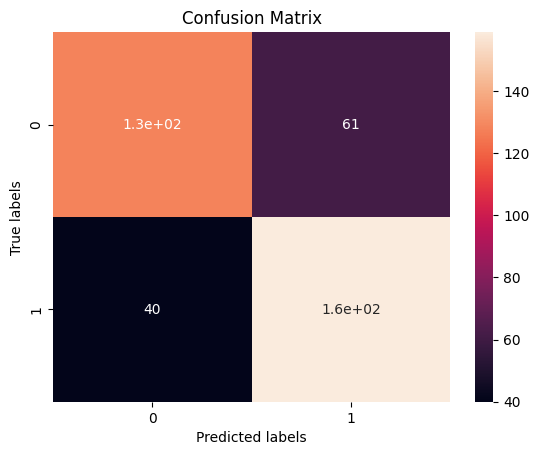

In [239]:
yhat=KNN.predict(X_test)
plot_confusion_matrix(y_test,yhat)

Text(0.5, 1.0, 'ROC')

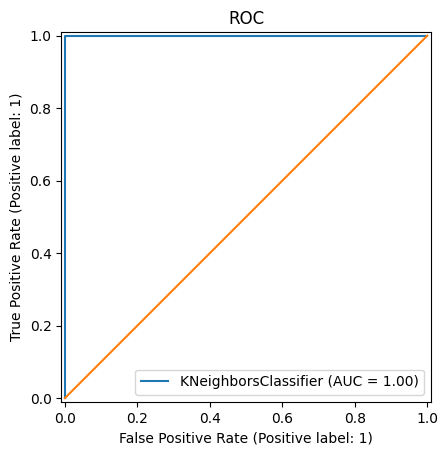

In [240]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(KNN,X_test,y_pred)
plt.plot([0,1],[0,1])
plt.title('ROC')

Grid Search

In [241]:
knn_1 = KNeighborsClassifier()

In [242]:
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV

In [243]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [244]:
knn_cv = GridSearchCV(knn_1, parameters)
knn_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [245]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 9}


In [246]:
knn_1 = KNeighborsClassifier(n_neighbors=9)

In [247]:
knn_1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [248]:
predictions_1 = knn_1.predict(X_test)

In [249]:
confusion_matrix(y_test,predictions_1)

array([[123,  66],
       [ 33, 166]])

In [250]:
accuracy_score(y_test,predictions_1, normalize=True)

0.7448453608247423

In [251]:
mae = mean_absolute_error(y_test, predictions_1)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.2551546391752577
